In [1]:
from datasets import load_dataset
from pprint import pformat,pprint

In [2]:
dataset = load_dataset("m3hrdadfi/recipe_nlg_lite").map(
    lambda batch: {
        'steps': batch['steps'].split(' . '),
        'ner': batch['ner'].split(' . '),
        'ingredients': batch['ingredients'].split(' . '),
    }
)
print(dataset)

Reusing dataset recipe_nlg_lite (/home/junikim/.cache/huggingface/datasets/m3hrdadfi___recipe_nlg_lite/1.0.0/1.0.0/2fd5f76dc1ed88ff2d6485b11497d6ae9516f4ebb2a6cb528dfaf0520bd8e51a)


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6118 [00:00<?, ?ex/s]

  0%|          | 0/1080 [00:00<?, ?ex/s]

DatasetDict({
    train: Dataset({
        features: ['uid', 'name', 'description', 'link', 'ner', 'ingredients', 'steps'],
        num_rows: 6118
    })
    test: Dataset({
        features: ['uid', 'name', 'description', 'link', 'ner', 'ingredients', 'steps'],
        num_rows: 1080
    })
})


In [6]:
import sklearn.cluster
from sentence_transformers import SentenceTransformer
from matplotlib import pyplot as plt

transformer = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')
subset = dataset['train'][:100]['name']
encoded = transformer.encode(subset)

# Results from Clustering

Elbow method doesn't seem to work? The square difference is linear...

Doing 2...
Doing 5...
Doing 8...
Doing 11...
Doing 14...
Doing 17...
Doing 20...
Doing 23...
Doing 26...
Doing 29...
Doing 32...
Doing 35...
Doing 38...
Doing 41...
Doing 44...
Doing 47...


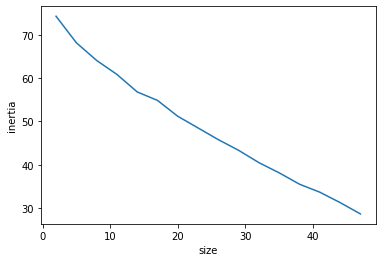

In [9]:
sse = {}
for size in range(2,50,3):
    print(f"Doing {size}...")
    model = sklearn.cluster.KMeans(size)
    model.fit(encoded)
    sse[size] = model.inertia_

plt.figure()
plt.xlabel("size")
plt.ylabel("inertia")
plt.plot(list(sse.keys()), list(sse.values()))
plt.show()

#pprint(list(sorted(zip(model.labels_, subset))))

In [8]:
import sklearn.cluster

model = sklearn.cluster.AgglomerativeClustering(20)
model.fit(encoded)

pprint(list(sorted(zip(model.labels_, subset))))

[(0, 'chili a la jimmy fallon'),
 (0, 'chili roasted okra'),
 (0, 'ciabatta cold cut sandwich with coleslaw'),
 (0, 'coconut chai rice pudding'),
 (0, 'easy "asian" peanut sauce'),
 (0, 'easy no cook salsa recipe'),
 (0, 'gai lan with oyster sauce'),
 (0, 'golden cod with baked peppers'),
 (0, 'kimchi fried rice with sesame egg'),
 (0, 'oyakudon'),
 (0, 'thai chicken coconut soup tom kha gai recipe'),
 (0, 'thai fish cakes with spicy sauce todman bla'),
 (1, 'brussels sprouts gratin with bacon breadcrumbs'),
 (1, 'cheeseburger dinner'),
 (1, 'crepes with goat cheese and strawberry rhubarb sauce'),
 (1, "j . alexander's mac and cheese"),
 (1, 'maple roasted butternut squash'),
 (1, 'quick string cheese spaghetti and meatballs'),
 (1, 'red kidney beans dumpling in rich tomato gravy'),
 (1, 'roasted man pecans'),
 (2, '5 ingredient almond cake with fresh berries'),
 (2, 'easy blueberry buttermilk cake'),
 (2, 'green smoothie aka the hulk'),
 (2, "maddy's favorite brownie sundaes"),
 (2, '